In [1]:
# coding: utf-8
import pygentoolbox
import time
import os

import numpy as np
from numpy.polynomial import polynomial
import pandas as pd

import matplotlib.pyplot as plt
import datashader as ds
import datashader.transfer_functions as tf
print('done')

done


In [3]:
plt.style.use("seaborn-whitegrid")

# Each column is was one data sample
# i reformatted the data to two colums
# first column is number from 0 - 5 representing timecourse timepoints, 0=VEG,1=MEI,2=FRG,3=DEV1,4=DEV2/3,5=DEV4
# second column is the gene expression values from ParameciumDB for genes overlapping SRCs
filepath = 'D:\\LinuxShare\\Projects\\Theresa\\SRCs\\SRCs.Ptiwi08Only.dataframe.1ColPerGene.tsv'
path, f = os.path.split(filepath)
df = pd.read_csv(filepath, sep='\t')

#divide each column by max value from that column
#df = np.log2(df)
df = df / df.max()
df = np.round(df, decimals=2)
print(df.isin([1.00]).sum(axis=1))  # count number of times 1.00 (the max value) is present in each timepoint

df.head(n=6)


#df = np.log2(df)
#df = np.round(df, decimals=2)
#df.head(n=6)

#### add column log2(gene expression)
###df['geneexpr_log2'] = np.log2(df['geneexpr'])
###delete old geneexpr column
###df.drop('geneexpr', inplace=True, axis=1)
###df.head()

0     4
1     2
2     1
3    17
4     7
5     4
dtype: int64


,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.00,0.00,0.02,0.47,0.83,0.01,0.00,1.00,1.00,0.00,...,0.33,0.00,0.00,0.00,0.62,0.51,0.85,0.00,0.00,NaN
1,0.14,0.25,0.07,0.45,0.78,0.00,0.01,0.56,0.44,0.02,...,0.39,0.01,0.01,0.00,0.71,1.00,1.00,0.00,0.00,NaN
2,0.09,0.25,0.14,0.76,0.78,0.06,0.11,0.48,0.16,0.04,...,0.47,0.10,0.12,0.06,0.73,0.83,0.78,0.05,0.02,NaN
3,1.00,1.00,1.00,0.48,0.63,1.00,1.00,0.57,0.31,1.00,...,0.64,1.00,1.00,1.00,0.99,0.64,0.46,1.00,1.00,NaN
4,0.97,0.96,0.71,1.00,0.70,0.60,0.57,0.71,0.54,0.77,...,0.73,0.64,0.75,0.64,1.00,0.28,0.54,0.48,0.47,NaN
5,0.21,0.15,0.25,0.47,1.00,0.06,0.05,0.77,0.44,0.09,...,1.00,0.08,0.12,0.19,0.82,0.52,0.27,0.04,0.12,NaN


     x     y
0  0.0  0.00
1  1.0  0.14
2  2.0  0.09
3  3.0  1.00
4  4.0  0.97
5  5.0  0.21
6  NaN   NaN
Time to aggregate line data: 1.8464889526367188
Time to create stacked image: 0.04686331748962402
Time to create stacked image: 0.040441274642944336


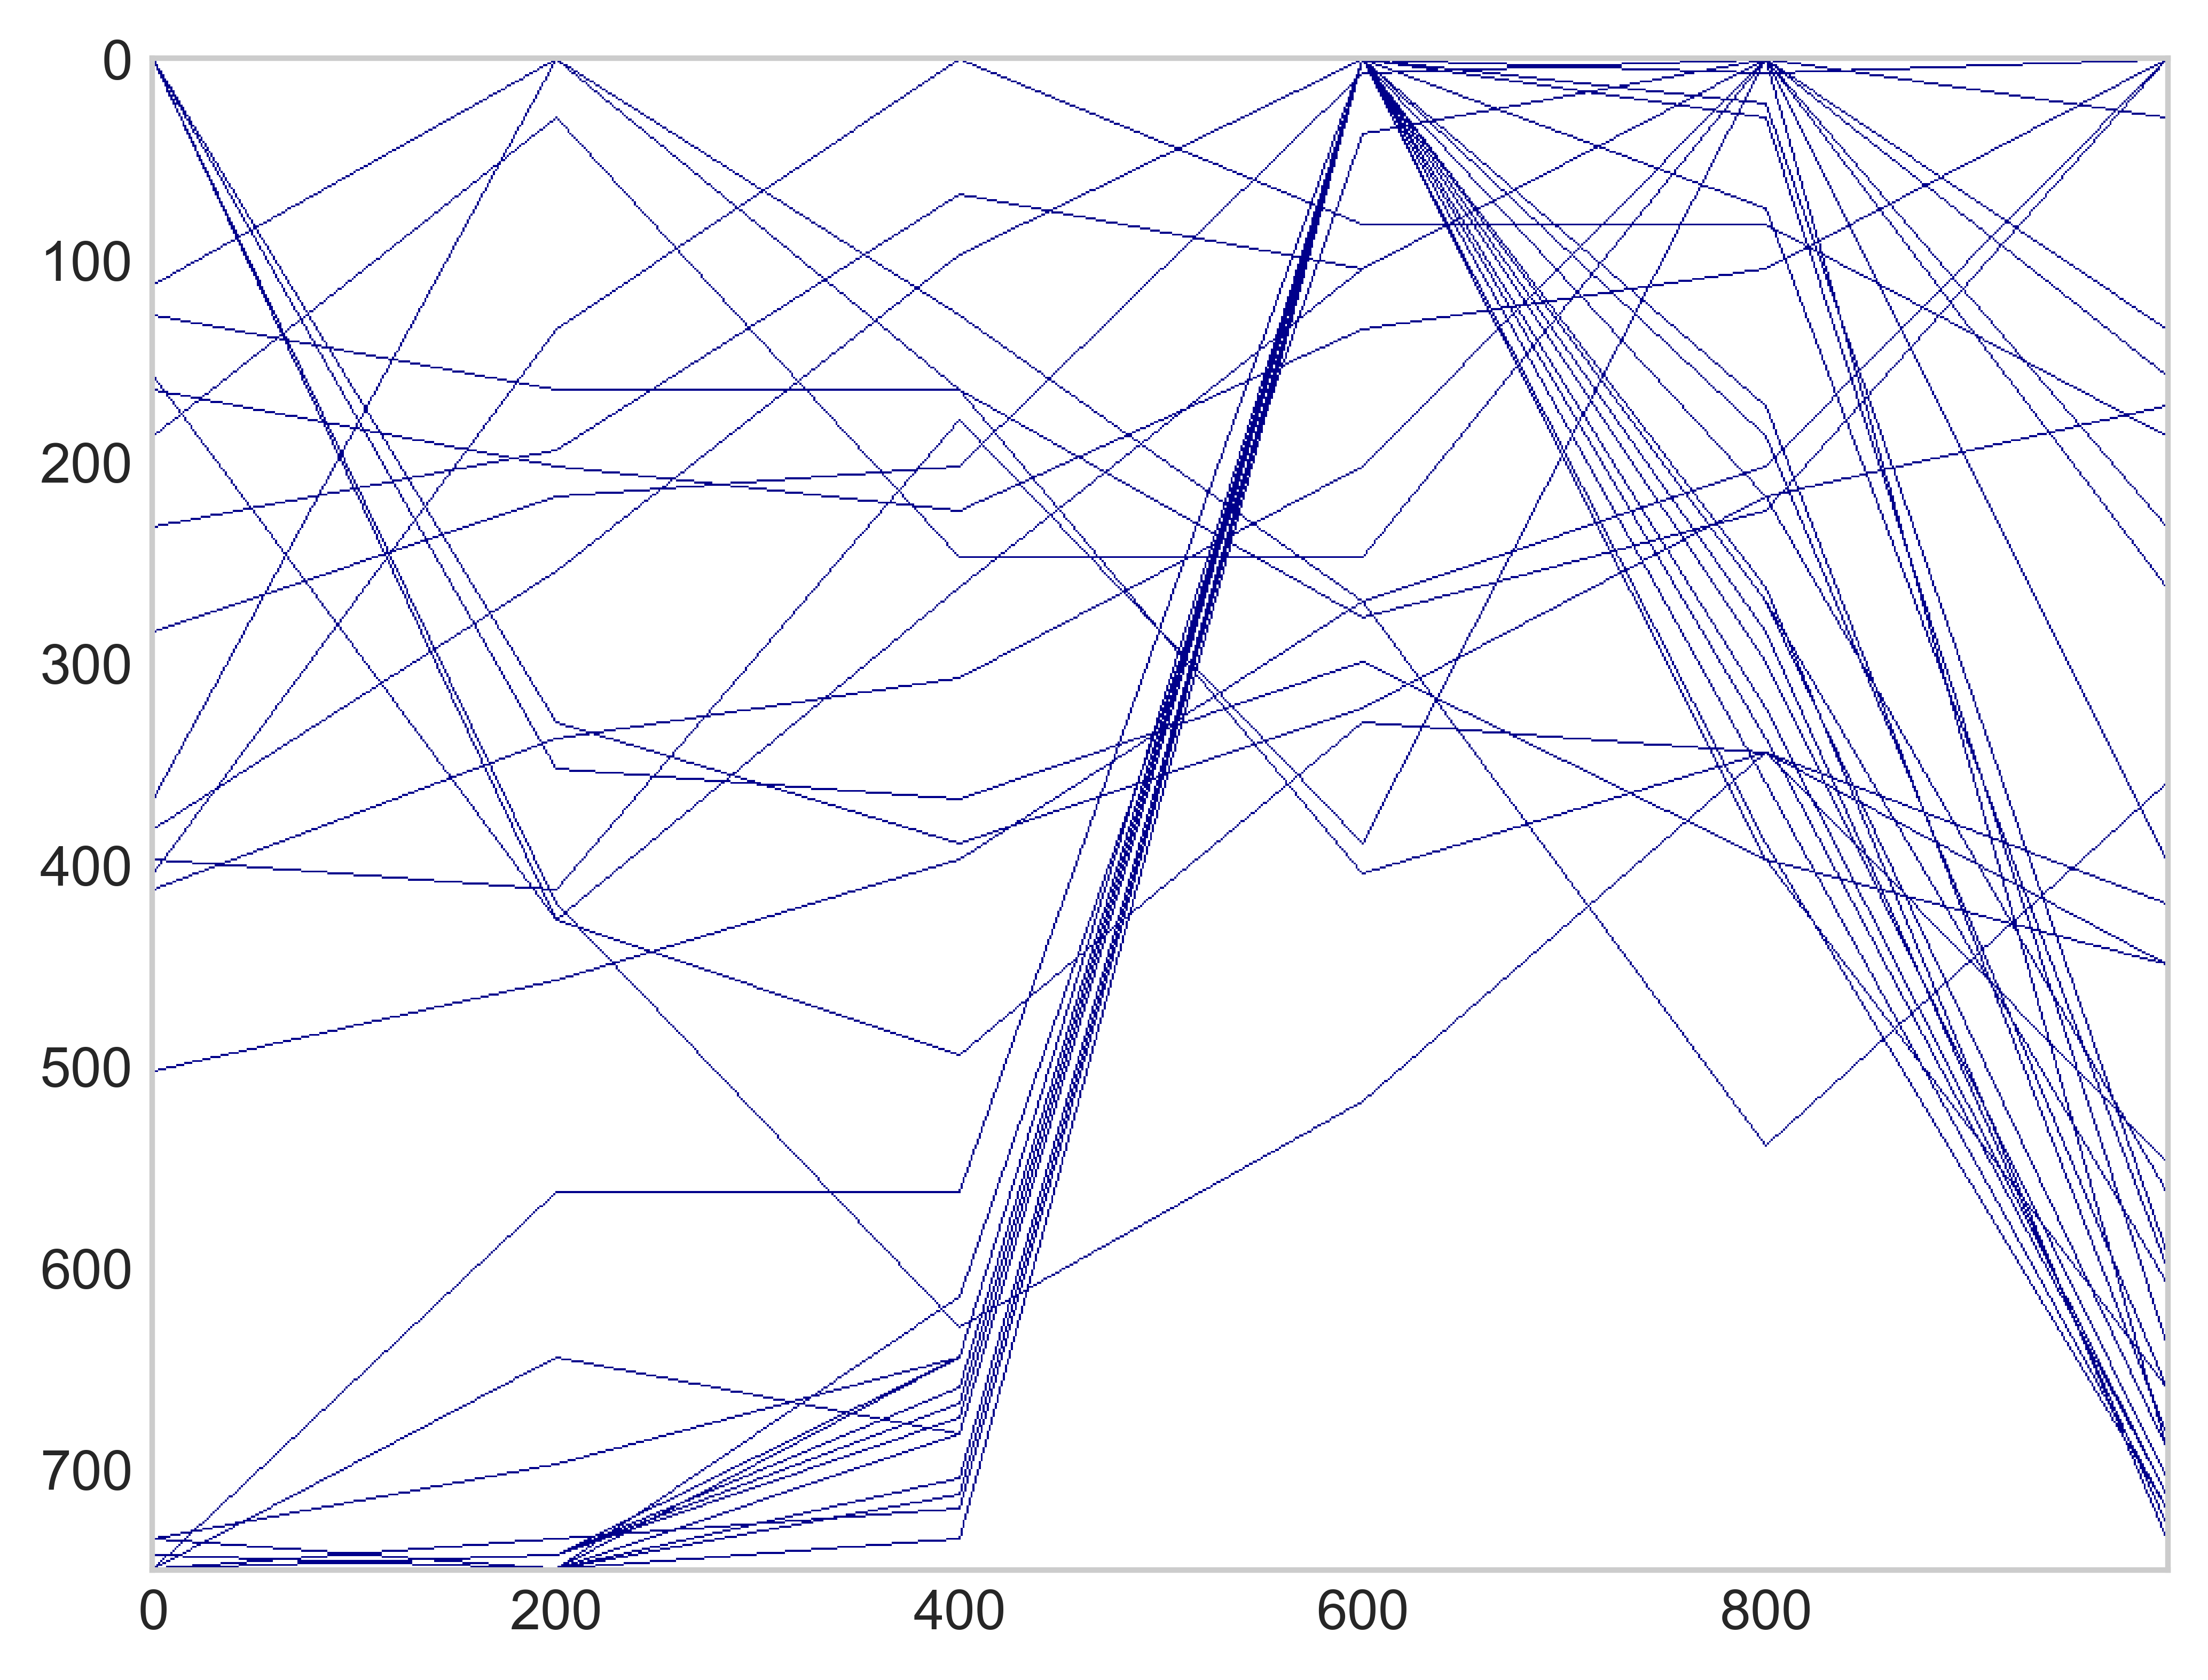

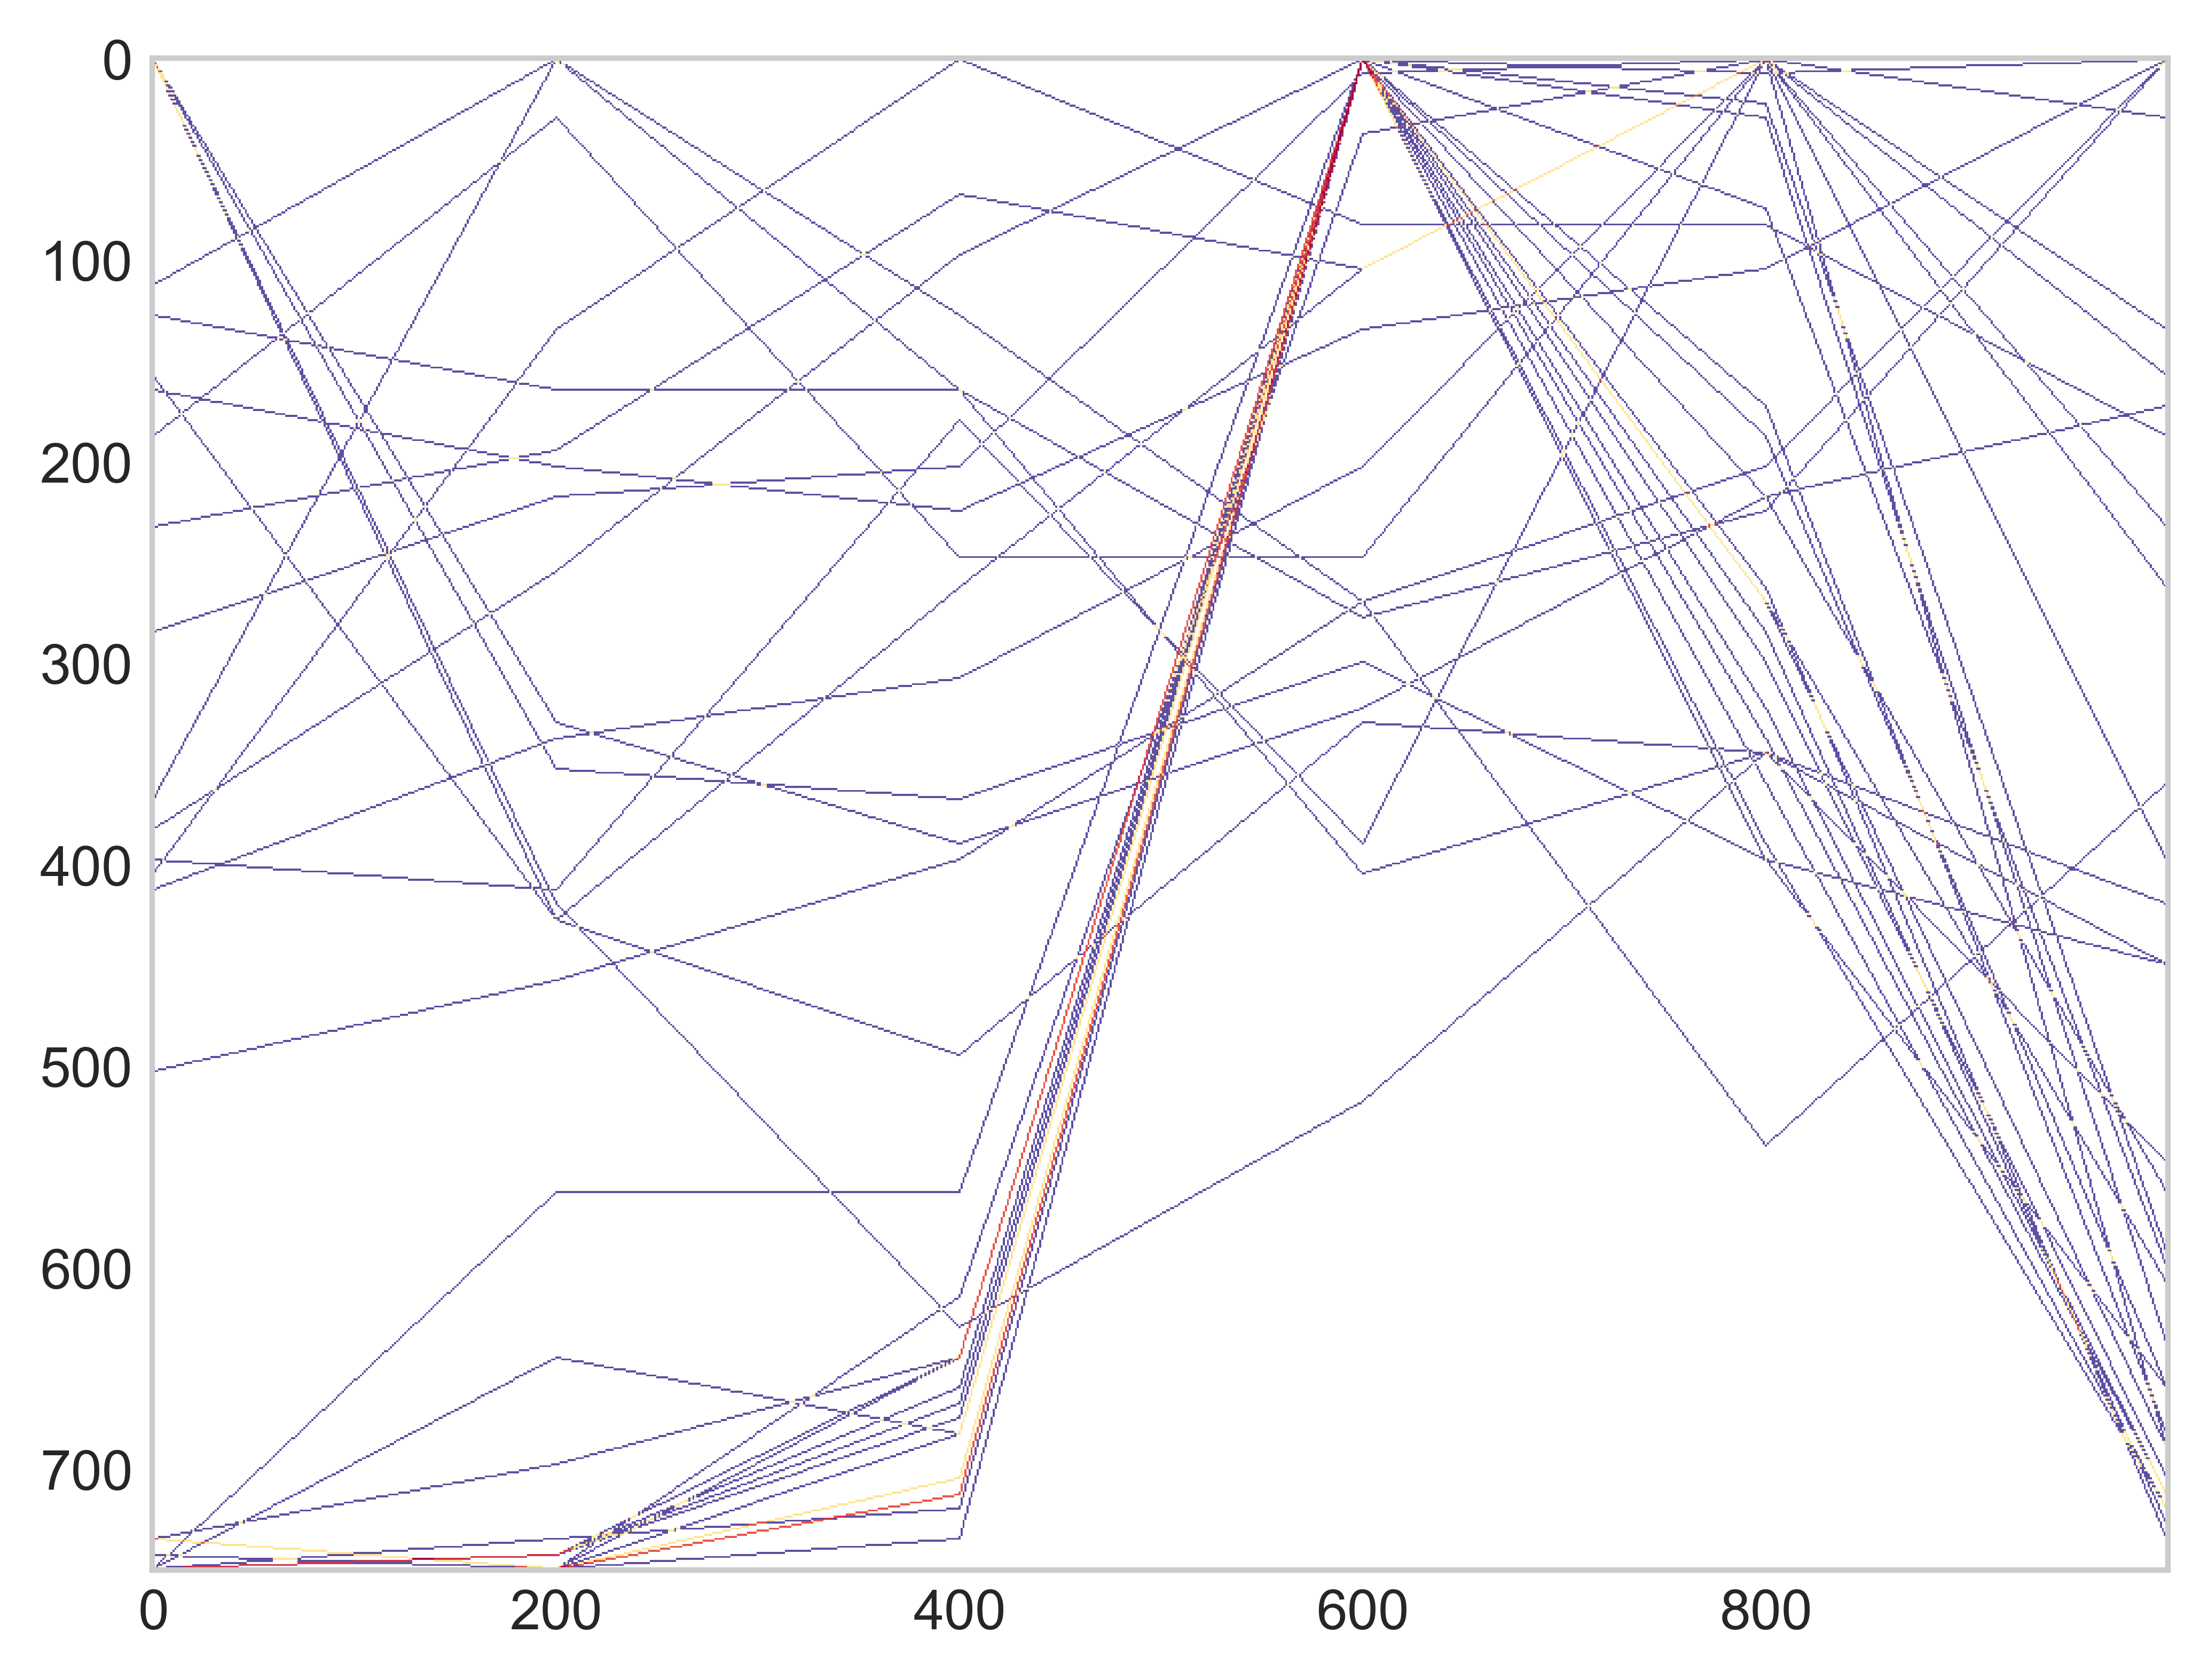

In [4]:

# Append row with nan-values
df = df.append(pd.DataFrame([np.array([np.nan] * len(df.columns))], columns=df.columns, index=[np.nan]))

# Reshape
x, y = df.shape
arr = df.values.reshape((x * y, 1), order='F')
df_reshaped = pd.DataFrame(arr, columns=list('y'), index=np.tile(df.index.values, y))
df_reshaped = df_reshaped.reset_index()
df_reshaped.columns.values[0] = 'x'
print(df_reshaped.head(n=7))


# Plotting parameters
x_range = (min(df.index.values), max(df.index.values))
y_range = (df.min().min(), df.max().max())
w = 1000
h = 750
dpi = 150
dpiscaling = 5  # use 5 or something, not really required
cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)

# Aggregate data
t0 = time.time()
aggs = cvs.line(df_reshaped, 'x', 'y', ds.count())
print("Time to aggregate line data: {}".format(time.time()-t0))

# One colored plot
t1 = time.time()
stacked_img = tf.Image(tf.shade(aggs, cmap=["darkblue", "darkblue"]))
print("Time to create stacked image: {}".format(time.time() - t1))

# Save
f0 = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi*dpiscaling)
ax0 = f0.add_subplot(111)
ax0.imshow(stacked_img.to_pil())
ax0.grid(False)
outfile = os.path.join(path, "stacked.png")
f0.savefig(outfile, bbox_inches="tight", dpi=dpi*dpiscaling)

# Heat map - This uses a equalized histogram (built-in default), there are other options, though.
t2 = time.time()
heatmap_img = tf.Image(tf.shade(aggs, cmap=plt.cm.Spectral_r))
print("Time to create stacked image: {}".format(time.time() - t2))

# Save
f1 = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi*dpiscaling)
ax1 = f1.add_subplot(111)
ax1.imshow(heatmap_img.to_pil())
ax1.grid(False)
outfile = os.path.join(path, "heatmap.png")
f1.savefig(outfile, bbox_inches="tight", dpi=dpi*dpiscaling)

In [3]:


# coding: utf-8
import pygentoolbox
import time

import numpy as np
from numpy.polynomial import polynomial
import pandas as pd

import matplotlib.pyplot as plt
import datashader as ds
import datashader.transfer_functions as tf

plt.style.use("seaborn-whitegrid")

def create_data():
    # ...

# Each column is one data sample
df = create_data()

# Following will append a nan-row and reshape the dataframe into two columns, with each sample stacked on top of each other
#   THIS IS CRUCIAL TO OPTIMIZE SPEED: https://github.com/bokeh/datashader/issues/286

# Append row with nan-values
df = df.append(pd.DataFrame([np.array([np.nan] * len(df.columns))], columns=df.columns, index=[np.nan]))

# Reshape
x, y = df.shape
arr = df.as_matrix().reshape((x * y, 1), order='F')
df_reshaped = pd.DataFrame(arr, columns=list('y'), index=np.tile(df.index.values, y))
df_reshaped = df_reshaped.reset_index()
df_reshaped.columns.values[0] = 'x'

# Plotting parameters
x_range = (min(df.index.values), max(df.index.values))
y_range = (df.min().min(), df.max().max())
w = 1000
h = 750
dpi = 150
cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=h, plot_width=w)

# Aggregate data
t0 = time.time()
aggs = cvs.line(df_reshaped, 'x', 'y', ds.count())
print("Time to aggregate line data: {}".format(time.time()-t0))

# One colored plot
t1 = time.time()
stacked_img = tf.Image(tf.shade(aggs, cmap=["darkblue", "darkblue"]))
print("Time to create stacked image: {}".format(time.time() - t1))

# Save
f0 = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
ax0 = f0.add_subplot(111)
ax0.imshow(stacked_img.to_pil())
ax0.grid(False)
f0.savefig("stacked.png", bbox_inches="tight", dpi=dpi)

# Heat map - This uses a equalized histogram (built-in default), there are other options, though.
t2 = time.time()
heatmap_img = tf.Image(tf.shade(aggs, cmap=plt.cm.Spectral_r))
print("Time to create stacked image: {}".format(time.time() - t2))

# Save
f1 = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
ax1 = f1.add_subplot(111)
ax1.imshow(heatmap_img.to_pil())
ax1.grid(False)
f1.savefig("heatmap.png", bbox_inches="tight", dpi=dpi)

IndentationError: expected an indented block (<ipython-input-3-aa8a30b0bd87>, line 7)